# Dealing with categorical predictors

### Problem:

We want to predict the students' performance in college (GPA) based on their previous performance (SAT).  However, for this project, another good suitable regressor for GPA is attendance.

Here we have the dataset that includes a variable that measures if a student attended more than 75 percent of their university lecturers (Dummies.csv).

This is categorical data so we cannot simply put it in the regression our approach will be to go through the process of using a dummy for our dataset (Dummies.csv).

## Import the relevant libraries

In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

## Load the data

In [2]:
# Loading the data from a .csv in the same folder.
raw_data = pd.read_csv('1.03. Dummies.csv')

In [3]:
# Checking what's inside this data frame
raw_data

,SAT,GPA,Attendance
0,1714,2.40,No
1,1664,2.52,No
2,1760,2.54,No
3,1685,2.74,No
4,1693,2.83,No
...,...,...,...
79,1936,3.71,Yes
80,1810,3.71,Yes
81,1987,3.73,No
82,1962,3.76,Yes


## Map the data

In [4]:
# Mapping all 'No' entries with 0, and all 'Yes' entries with 1, puting that in a new variable called 'data'
data = raw_data.copy()
data['Attendance'] = data['Attendance'].map({'Yes': 1, 'No': 0})

# Checking what's inside
data

,SAT,GPA,Attendance
0,1714,2.40,0
1,1664,2.52,0
2,1760,2.54,0
3,1685,2.74,0
4,1693,2.83,0
...,...,...,...
79,1936,3.71,1
80,1810,3.71,1
81,1987,3.73,0
82,1962,3.76,1


In [5]:
data.describe()

,SAT,GPA,Attendance
count,84.000000,84.000000,84.000000
mean,1845.273810,3.330238,0.464286
std,104.530661,0.271617,0.501718
min,1634.000000,2.400000,0.000000
25%,1772.000000,3.190000,0.000000
50%,1846.000000,3.380000,0.000000
75%,1934.000000,3.502500,1.000000
max,2050.000000,3.810000,1.000000


## Regression

In [6]:
# Following the regression equation, our dependent variable (y) is the GPA
y = data ['GPA']
# Similarly, our independent variable (x) is the SAT score
x1 = data [['SAT','Attendance']]

In [7]:
# Adding a constant. Esentially, I am adding a new column (equal in lenght to x), which consists only of 1s
x = sm.add_constant(x1)
# Fitting the model, according to the OLS (ordinary least squares) method with a dependent variable y and an idependent x
results = sm.OLS(y,x).fit()
# Printing a nice summary of the regression
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    GPA   R-squared:                       0.565
Model:                            OLS   Adj. R-squared:                  0.555
Method:                 Least Squares   F-statistic:                     52.70
Date:                Tue, 26 Jan 2021   Prob (F-statistic):           2.19e-15
Time:                        10:48:18   Log-Likelihood:                 25.798
No. Observations:                  84   AIC:                            -45.60
Df Residuals:                      81   BIC:                            -38.30
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.6439      0.358      1.797      0.076      -0.069       1.357
SAT            0.0014      0.000      7.141      0.000       0.001       0.002
Attendance     0.2226      0.041      5.451      0.000       0.141       0.304
==============================================================================
Omnibus:                       19.560   Durbin-Watson:                   1.009
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               27.189
Skew:                          -1.028   Prob(JB):                     1.25e-06
Kurtosis:                       4.881   Cond. No.                     3.35e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.35e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Plot the regression line(s) on the scatter plot

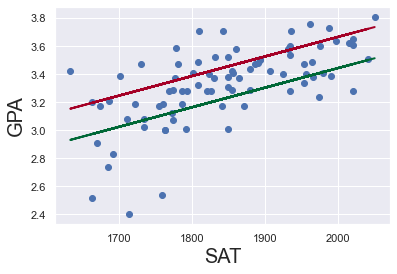

In [8]:
# Creating a scatter plot of SAT and GPA
plt.scatter(data['SAT'],y)
# Defining the two regression equations, depending on whether they attended (yes), or didn't (no)
yhat_no = 0.6439 + 0.0014*data['SAT']
yhat_yes = 0.8665 + 0.0014*data['SAT']
# Plotting the two regression lines
fig = plt.plot(data['SAT'],yhat_no, lw=2, c='#006837')
fig = plt.plot(data['SAT'],yhat_yes, lw=2, c='#a50026')
# Naming the axes
plt.xlabel('SAT', fontsize = 20)
plt.ylabel('GPA', fontsize = 20)
plt.show()

## Plot the regression line(s) on the scatter plot and color the data points

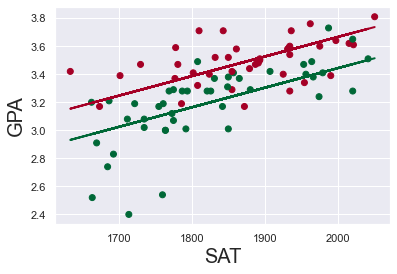

In [9]:
# In this code I want to colour the points depending on attendance

# Creating one scatter plot which contains all observations
# Using the series 'Attendance' as color, and choosing a colour map (cmap) 
plt.scatter(data['SAT'],data['GPA'], c=data['Attendance'],cmap='RdYlGn_r')

# Defining the two regression equations (one with a dummy = 1, the other with dummy = 0)
# For the sake of consistency, I will also include them here
yhat_no = 0.6439 + 0.0014*data['SAT']
yhat_yes = 0.8665 + 0.0014*data['SAT']

# Plotting the two regression lines
fig = plt.plot(data['SAT'],yhat_no, lw=2, c='#006837')
fig = plt.plot(data['SAT'],yhat_yes, lw=2, c='#a50026')
plt.xlabel('SAT', fontsize = 20)
plt.ylabel('GPA', fontsize = 20)
plt.show()

## Add the original regression line

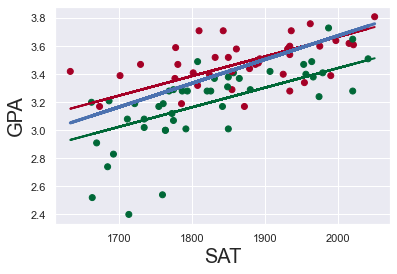

In [10]:
# Same as above, though this time I am including the regression line WITHOUT the dummies.

plt.scatter(data['SAT'],data['GPA'], c=data['Attendance'],cmap='RdYlGn_r')

yhat_no = 0.6439 + 0.0014*data['SAT']
yhat_yes = 0.8665 + 0.0014*data['SAT']
# Original regression line
yhat = 0.0017*data['SAT'] + 0.275

# Plotting the two regression lines
fig = plt.plot(data['SAT'],yhat_no, lw=2, c='#006837', label ='regression line1')
fig = plt.plot(data['SAT'],yhat_yes, lw=2, c='#a50026', label ='regression line2')
# Plotting the original regression line
fig = plt.plot(data['SAT'],yhat, lw=3, c='#4C72B0', label ='regression line')

plt.xlabel('SAT', fontsize = 20)
plt.ylabel('GPA', fontsize = 20)
plt.show()

# Making predictions based on the created regressions

In [11]:
# Checking the independent variable 
x

,const,SAT,Attendance
0,1.0,1714,0
1,1.0,1664,0
2,1.0,1760,0
3,1.0,1685,0
4,1.0,1693,0
...,...,...,...
79,1.0,1936,1
80,1.0,1810,1
81,1.0,1987,0
82,1.0,1962,1


In [12]:
# Creating a new data frame, identical in organization to X.
new_data = pd.DataFrame({'const': 1,'SAT': [1700, 1670], 'Attendance': [0, 1]})
# By default, when we create a df the columns are sorted alphabetically
# So if I don't reorder them, they would be 'Attendance', 'const', 'SAT'
# If I feed them in the wrong order, I will get wrong results...
new_data = new_data[['const','SAT','Attendance']]
new_data

,const,SAT,Attendance
0,1,1700,0
1,1,1670,1


In [13]:
# I am renaming the indices for the purposes of this example.
# That's by not really a good practice => I won't overwrite the variable.
# If I want to use NumPy, sklearn, etc. methods on a df with renamed indices, they will simply be lost
# and returned to 0,1,2,3, etc.
new_data.rename(index={0: 'Bob',1:'Alice'})

,const,SAT,Attendance
Bob,1,1700,0
Alice,1,1670,1


In [14]:
# Using the predict method on the regression with the new data as a single argument
predictions = results.predict(new_data)
# The result
predictions

0    3.023513
1    3.204163
dtype: float64

In [16]:
# Creating a data frame, including everything
predictionsdf = pd.DataFrame({'Predictions':predictions})
# Joining the two data frames
joined = new_data.join(predictionsdf)
# Renaming the indices as before (not a good practice in general) 
joined.rename(index={0: 'Bob',1:'Alice'})
joined

,const,SAT,Attendance,Predictions
0,1,1700,0,3.023513
1,1,1670,1,3.204163
